# Packages

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Neurons without activation

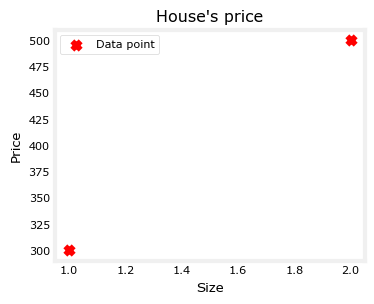

In [78]:
x = np.array([[1.], [2.]])
y = np.array([[300.], [500.]])

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(x, y, c='red', marker='x', label='Data point')

ax.set_title("House's price")
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.legend()
plt.show()

In [79]:
# create one layer have one neuron without activation(linear)
linear_layer = Dense(units=1, activation='linear')
print('have no weight yet')
linear_layer.get_weights()

have no weight yet


[]

In [80]:
# trigger neurons' weight by try 1 samples
print('Trigger neuron')
try_inference = linear_layer(x)
print(f'try inference: {try_inference}')
w, b = linear_layer.get_weights()
print(f'have weight yet: w->{w}, b->{b}')

Trigger neuron
try inference: [[-1.04]
 [-2.08]]
have weight yet: w->[[-1.04]], b->[0.]


In [81]:
# set weight for neuron
w = np.array([[200.]])
b = np.array([100.])

linear_layer.set_weights([w, b])
print(f"Now, model's weight: {linear_layer.get_weights()}")

Now, model's weight: [array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [82]:
# prediction
prediction = linear_layer(x)
print(f'prediction: {prediction}')

prediction: [[300.]
 [500.]]


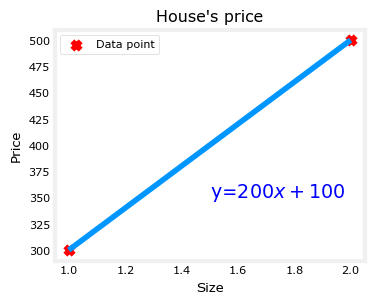

In [83]:
# plot model
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(x, y, c='red', marker='x', label='Data point')
ax.plot(x, prediction)
ax.text(1.5,350,r"y=$200 x + 100$", fontsize='xx-large', c='blue')

ax.set_title("House's price")
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.legend()
plt.show()

# Neuron with Sigmoid function

In [84]:
x = np.array([0., 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([0,  0, 0, 1, 1, 1]).reshape(-1, 1)
pos = (y == 1)
neg = (y == 0)
x[pos]

array([3., 4., 5.])

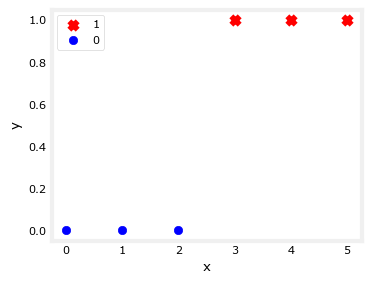

In [85]:
# plot dataset
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.scatter(x[pos], y[pos], c='red', marker='x', label='1')
ax.scatter(x[neg], y[neg], c='blue', marker='o', label='0')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [86]:
logistic_layer = Dense(units=1, input_dim=1, activation='sigmoid')
logistic_layer(x)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.5 ],
       [0.85],
       [0.97],
       [0.99],
       [1.  ],
       [1.  ]], dtype=float32)>

In [87]:
logistic_layer.get_weights()

[array([[1.71]], dtype=float32), array([0.], dtype=float32)]

In [88]:
w = np.array([[2]])
b = np.array([-4.5])
logistic_layer.set_weights([w, b])
print(f'weight of logistic_layer: {logistic_layer.get_weights()}')

weight of logistic_layer: [array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


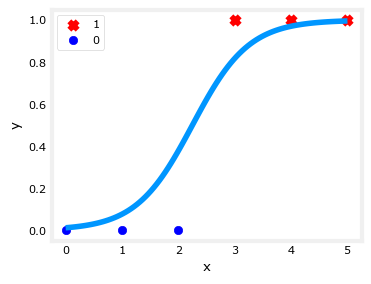

In [94]:
# plot model
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
prediction = logistic_layer(x_plot)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.scatter(x[pos], y[pos], c='red', marker='x', label='1')
ax.scatter(x[neg], y[neg], c='blue', marker='o', label='0')
ax.plot(x_plot, prediction)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()